In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
before_m_living = pd.read_excel("data/코로나이전_한달살기.xlsx")

In [3]:
before_m_living.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/kiho_no?Redirect=Log&lo...,2018.03.25.,아빠와 떠나는 베트남 한달살기 예상 비용,"['#베트남호치민한달살기예상비용', '#베트남한달살기비용', '#호치민한달살기비용'...","[""\n\n\n호치민 이란 인물은 참 대단하다. 베트남모든 지폐에 전속 모델로 나오..."
1,https://blog.naver.com/jasmin216?Redirect=Log&...,2017.08.17.,제주에서 한달 살기,[],"['', '', '요즘 어디에서 한달 살기가 유행이라지요.', '하와이에서 한달살기..."
2,https://blog.naver.com/ahrdkvkfk?Redirect=Log&...,2018.01.24.,제주도 한달살기 여기만 한 곳 없다,[],"['안녕하세요!제주도 한달살기에 적합한 메종드협재입니다.', '최근 제.주에 정착해..."
3,https://blog.naver.com/glitterjoara?Redirect=L...,2018.04.20.,제주에서 한달살기 숙소부터추천,"['#제주에서한달살기', '#제주도한달살기', '#제주한달살기숙소', '#제주도숙박...",['안녕하세요드디어 제가 제주에서 한달살기를 끝내고 돌아왔어요.첨엔 긴 시간이라고 ...
4,https://blog.naver.com/great01234?Redirect=Log...,2017.05.01.,"제주, 제주도 한달살기 숙소 _ 연동",[],"['제주시 연동, 한달살기 숙소오픈이 되었습니다.차량 렌트를 하지 않는 뚜벅이 여행..."


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
before_m_living["hashtags"] = before_m_living["hashtags"].apply(ast.literal_eval)
before_m_living["contents"] = before_m_living["contents"].apply(ast.literal_eval)

In [5]:
before_m_living = before_m_living[(before_m_living["hashtags"].str.len() != 0) | (before_m_living["contents"].str.len() != 0)]

In [6]:
len(before_m_living)

1989

- hashtags랑 contents 데이터 합치기

In [7]:
before_m_living["info"] = before_m_living["hashtags"] + before_m_living["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [8]:
before_m_living["info"] = before_m_living["info"].map(lambda x: ' '.join(x))

In [9]:
before_m_living["info"] = before_m_living["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [10]:
okt = Okt()
before_m_living["info"] = before_m_living["info"].map(lambda x: okt.nouns(x))

In [11]:
before_m_living["info"]

0       [베트남, 호치민, 한달살기, 예상, 비용, 베트남, 한달살기, 비용, 호치민, 한...
1       [요즘, 어디, 달, 살기, 유행, 하와이, 한달살기, 발리, 한달살기, 창문, 산...
2       [제주도, 한달살기, 메종드협재입니, 최근, 제주, 정착, 자신, 삶, 연예인, 모...
3       [제주, 한달살기, 제주도, 한달살기, 제주, 한달살기, 숙소, 제주도, 숙박, 제...
4       [제주시, 연동, 한달살기, 숙소, 오픈, 차량, 렌트, 뚜벅, 여행객, 버스, 자...
                              ...                        
1995    [제주, 제주, 올레, 제주, 한달살기, 제주, 바다, 올레, 한달살기, 제주도, ...
1996    [호주, 한달살기, 브리즈번, 한달살기, 호주, 브리즈번, 다음주, 본격, 시작, ...
1997    [세계, 여행, 해외여행, 밴프, 여행, 캐나다, 여행, 부킹, 부킹, 부킹, 할인...
1998    [여자, 혼자, 해외여행, 외국, 한달살기, 방콕여행, 혼자, 해외여행, 여자, 혼...
1999    [한달살기, 해외, 한달살기, 여행, 해외, 달, 살기, 장점, 대한, 글, 일주일...
Name: info, Length: 1989, dtype: object

# WordCloud

In [12]:
word_tokens = list(before_m_living["info"])
word_tokens = sum(word_tokens, [])

In [13]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [14]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

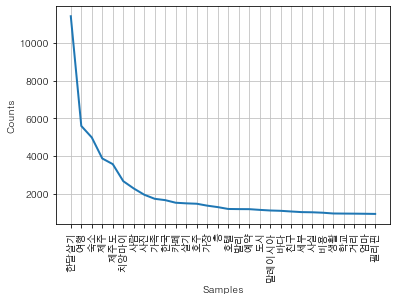

In [15]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

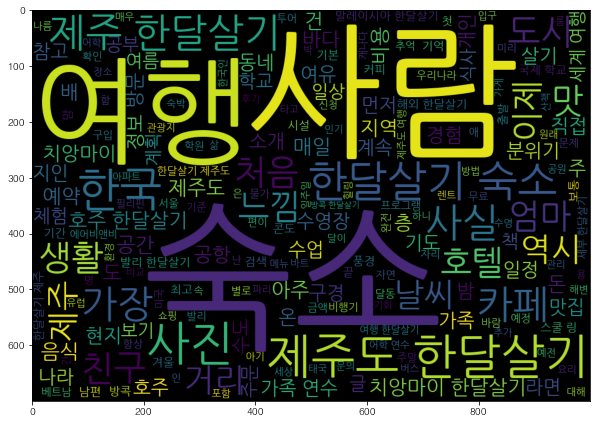

In [16]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('한달살기_코로나전.png')

# Word2vec

In [17]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = before_m_living["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [18]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [19]:
print("한달살기와 제주의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "제주")))

한달살기와 제주의 단어간 유사도는 0.45 입니다.


In [20]:
print("한달살기와 여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "여행")))

한달살기와 여행의 단어간 유사도는 0.75 입니다.


In [21]:
print("한달살기와 힐링의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "힐링")))

한달살기와 힐링의 단어간 유사도는 0.49 입니다.


In [22]:
print("한달살기와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("한달살기", "힐링여행")))

한달살기와 힐링여행의 단어간 유사도는 0.58 입니다.


# LDA

In [24]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

In [25]:
dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(data) for data in dataset]

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [27]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 1;
    step = 5;
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

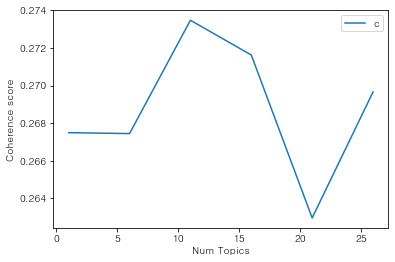

In [28]:
find_optimal_number_of_topics(dictionary, corpus, dataset)

In [29]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=11, passes=30)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.020*"여행" + 0.018*"한달살기" + 0.013*"파리" + 0.011*"유럽" + 0.007*"사진"')
(1, '0.061*"치앙마이" + 0.015*"태국" + 0.014*"카페" + 0.012*"여행" + 0.011*"한달살기"')
(2, '0.034*"한달살기" + 0.032*"제주" + 0.030*"제주도" + 0.029*"숙소" + 0.011*"층"')
(3, '0.024*"제주" + 0.021*"한달살기" + 0.020*"제주도" + 0.008*"사진" + 0.006*"여행"')
(4, '0.042*"한달살기" + 0.025*"세부" + 0.023*"필리핀" + 0.022*"가족" + 0.020*"어학"')
(5, '0.024*"숙소" + 0.018*"한달살기" + 0.014*"호텔" + 0.013*"치앙마이" + 0.012*"콘도"')
(6, '0.026*"발리" + 0.012*"한달살기" + 0.009*"숙소" + 0.009*"제주도" + 0.008*"사진"')
(7, '0.065*"호주" + 0.029*"한달살기" + 0.020*"브리즈번" + 0.012*"골드코스트" + 0.007*"콩"')
(8, '0.036*"말레이시아" + 0.032*"학교" + 0.030*"한달살기" + 0.026*"캠프" + 0.022*"조호바루"')
(9, '0.032*"여행" + 0.030*"한달살기" + 0.012*"사람" + 0.009*"하와이" + 0.009*"도시"')
(10, '0.029*"방콕" + 0.015*"여행" + 0.015*"한달살기" + 0.009*"사람" + 0.006*"숙소"')


In [30]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (c_v): ', coherence_lda)

Coherence Score (c_v):  0.41747828341504784


In [31]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)


Coherence Score (u_mass):  -1.8878101405965895


In [32]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
                
    return(topic_table)

In [33]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.5159,"[(0, 0.07503356), (4, 0.22053018), (5, 0.51589..."
1,1,3.0,0.6433,"[(2, 0.26422322), (3, 0.64333546), (5, 0.02503..."
2,2,2.0,0.6657,"[(2, 0.6656643), (3, 0.25121245), (4, 0.075676..."
3,3,6.0,0.4536,"[(2, 0.32681406), (4, 0.058833826), (6, 0.4535..."
4,4,2.0,0.9946,"[(2, 0.9945526)]"
...,...,...,...,...
1984,1984,2.0,0.8949,"[(2, 0.8948509), (5, 0.098774426)]"
1985,1985,7.0,0.4626,"[(7, 0.4626431), (8, 0.10990607), (9, 0.413970..."
1986,1986,9.0,0.9981,"[(9, 0.99806666)]"
1987,1987,5.0,0.4417,"[(1, 0.058296707), (5, 0.4416582), (6, 0.12289..."


In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)